<a href="https://colab.research.google.com/github/merinpriyasha/Survelliance-system/blob/main/Weather_Prediction_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Import the libraries
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/43450.01.01.2015.08.03.2022.1.0.0.en.utf8.00000000.xlsx', skiprows=[0,1,2,3,4,5])
df

,Local time in Katunayake / Bandaranaike (airport),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,08.03.2022 23:30,26.0,757.7,758.6,NaN,84.0,"Calm, no wind",0.0,NaN,NaN,...,"No Altocumulus, Altostratus or Nimbostratus.","Cirrus (often in bands) and Cirrostratus, or C...",10,23.1,No precipitation,3.0,NaN,NaN,NaN,NaN
1,08.03.2022 08:30,28.6,757.6,758.5,NaN,83.0,"Calm, no wind",0.0,NaN,NaN,...,"No Altocumulus, Altostratus or Nimbostratus.","Cirrus (often in bands) and Cirrostratus, or C...",10,25.5,No precipitation,3.0,NaN,NaN,NaN,NaN
2,08.03.2022 02:30,25.4,756.3,757.2,-1.3,93.0,"Calm, no wind",0.0,NaN,NaN,...,"No Altocumulus, Altostratus or Nimbostratus.","Cirrus (often in bands) and Cirrostratus, or C...",9,24.2,No precipitation,3.0,NaN,NaN,NaN,NaN
3,07.03.2022 23:30,26.5,757.6,758.5,NaN,89.0,"Calm, no wind",0.0,NaN,NaN,...,"No Altocumulus, Altostratus or Nimbostratus.","Cirrus (often in bands) and Cirrostratus, or C...",20,24.5,No precipitation,3.0,NaN,NaN,NaN,NaN
4,07.03.2022 08:30,27.4,757.1,758.0,NaN,80.0,Wind blowing from the north-east,3.0,NaN,NaN,...,"No Altocumulus, Altostratus or Nimbostratus.","Cirrus (often in bands) and Cirrostratus, or C...",20,23.6,No precipitation,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17003,07.01.2015 02:30,24.0,757.5,758.2,NaN,91.0,Wind blowing from the north-east,4.0,NaN,NaN,...,Altocumulus translucidus at a single level.,"Cirrus fibratus, sometimes uncinus, not progre...",16,22.5,No precipitation,3.0,NaN,NaN,NaN,NaN
17004,04.01.2015 02:30,23.5,758.0,758.7,NaN,94.0,"Calm, no wind",0.0,NaN,NaN,...,"No Altocumulus, Altostratus or Nimbostratus.","Cirrus fibratus, sometimes uncinus, not progre...",8,22.5,No precipitation,3.0,NaN,NaN,NaN,NaN
17005,03.01.2015 02:30,22.0,758.0,758.7,NaN,97.0,"Calm, no wind",0.0,NaN,NaN,...,"No Altocumulus, Altostratus or Nimbostratus.","Cirrus fibratus, sometimes uncinus, not progre...",8,21.5,No precipitation,3.0,NaN,NaN,NaN,NaN
17006,02.01.2015 02:30,23.1,757.0,757.7,NaN,98.0,Wind blowing from the south-east,2.0,NaN,NaN,...,"No Altocumulus, Altostratus or Nimbostratus.","Cirrus fibratus, sometimes uncinus, not progre...",7,22.7,No precipitation,3.0,NaN,NaN,NaN,NaN


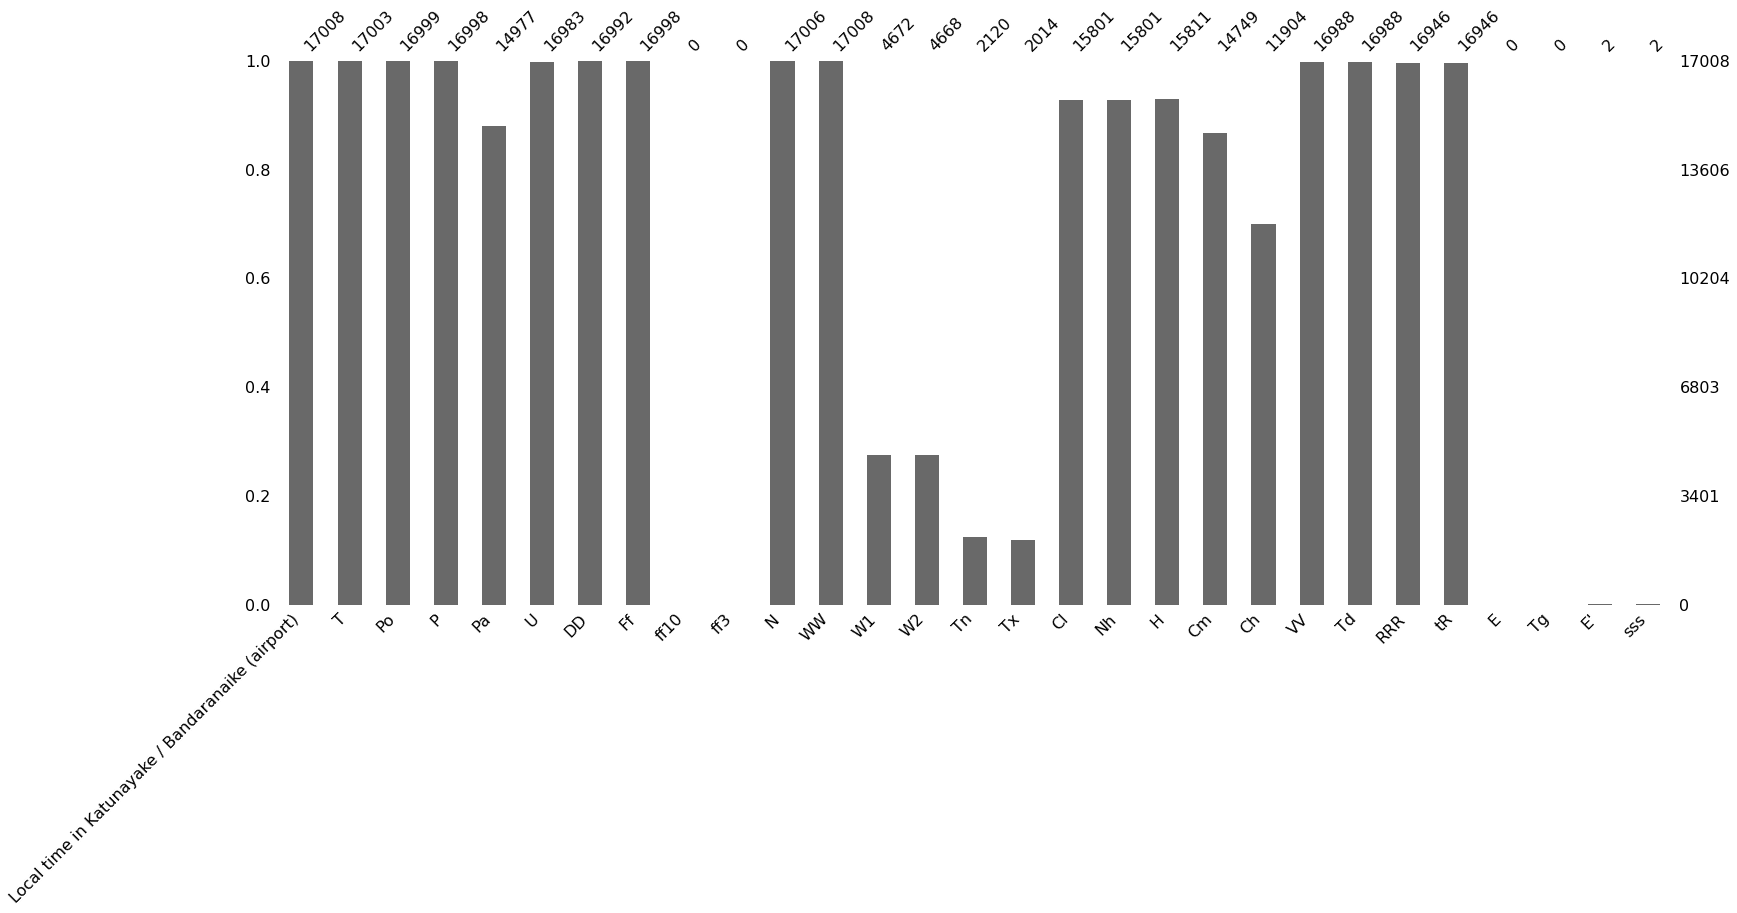

In [ ]:
#Null values vizualising
import missingno as masno
masno.bar(df) 

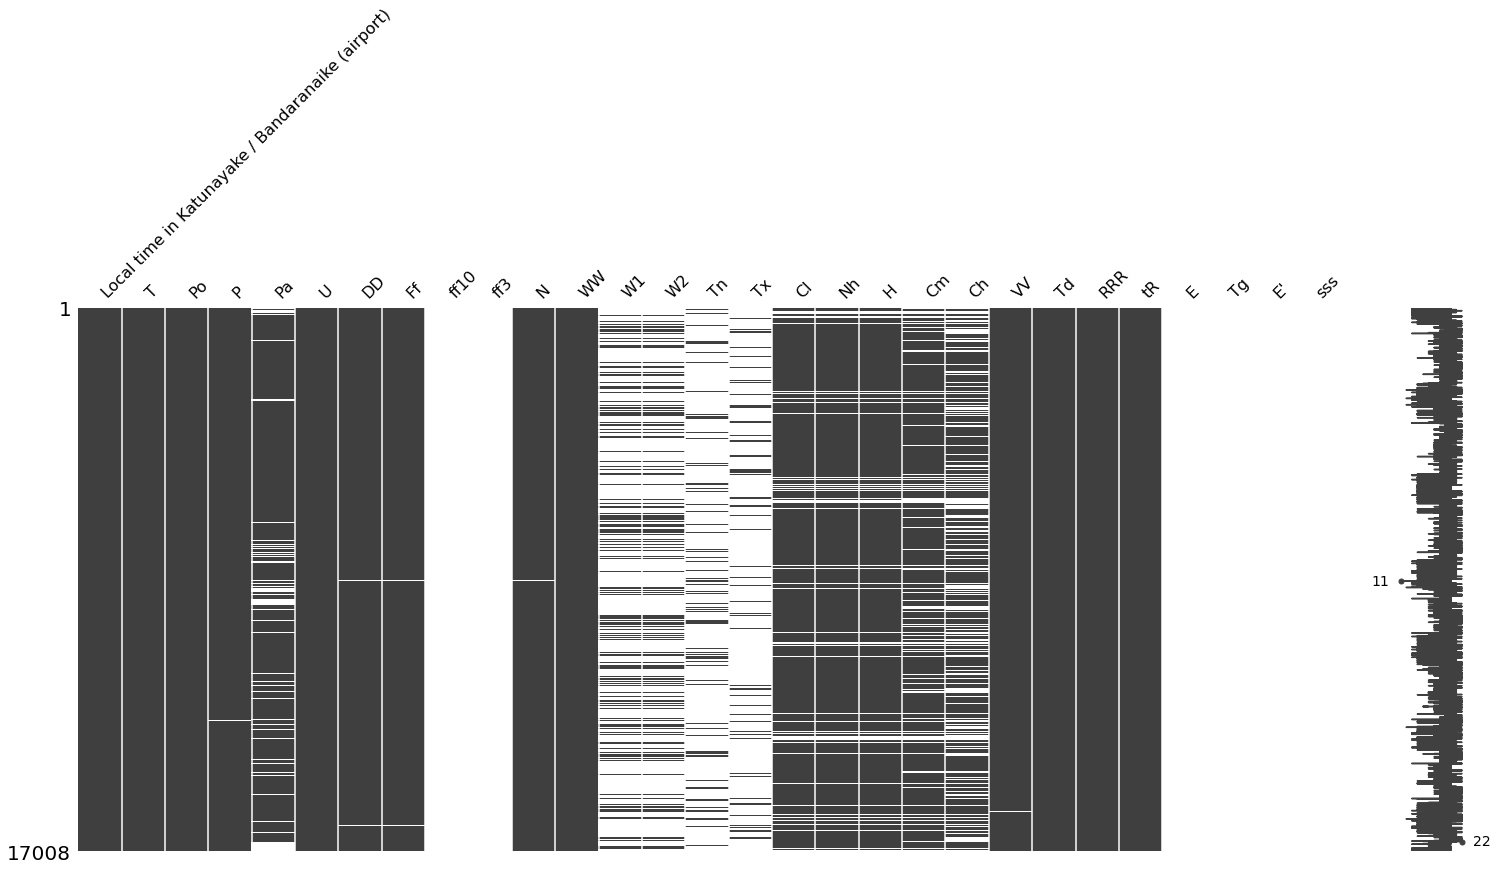

In [ ]:
#Matrix chart 
masno.matrix(df) #White represent null values & black represent not null value

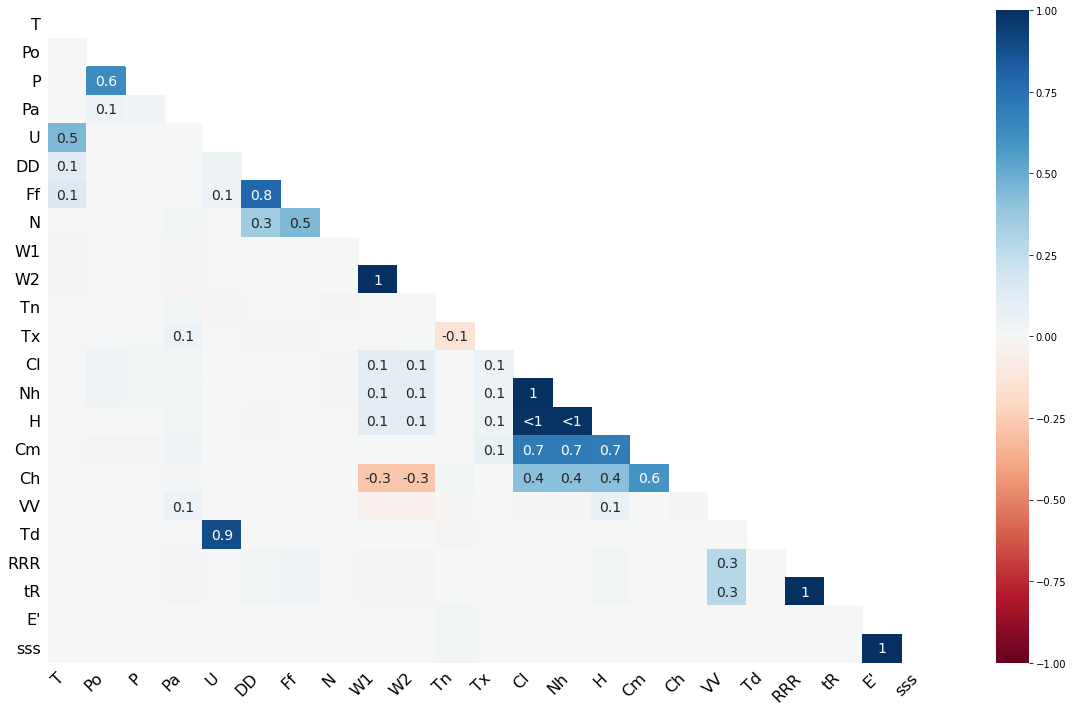

In [ ]:
#Heat map
masno.heatmap(df)

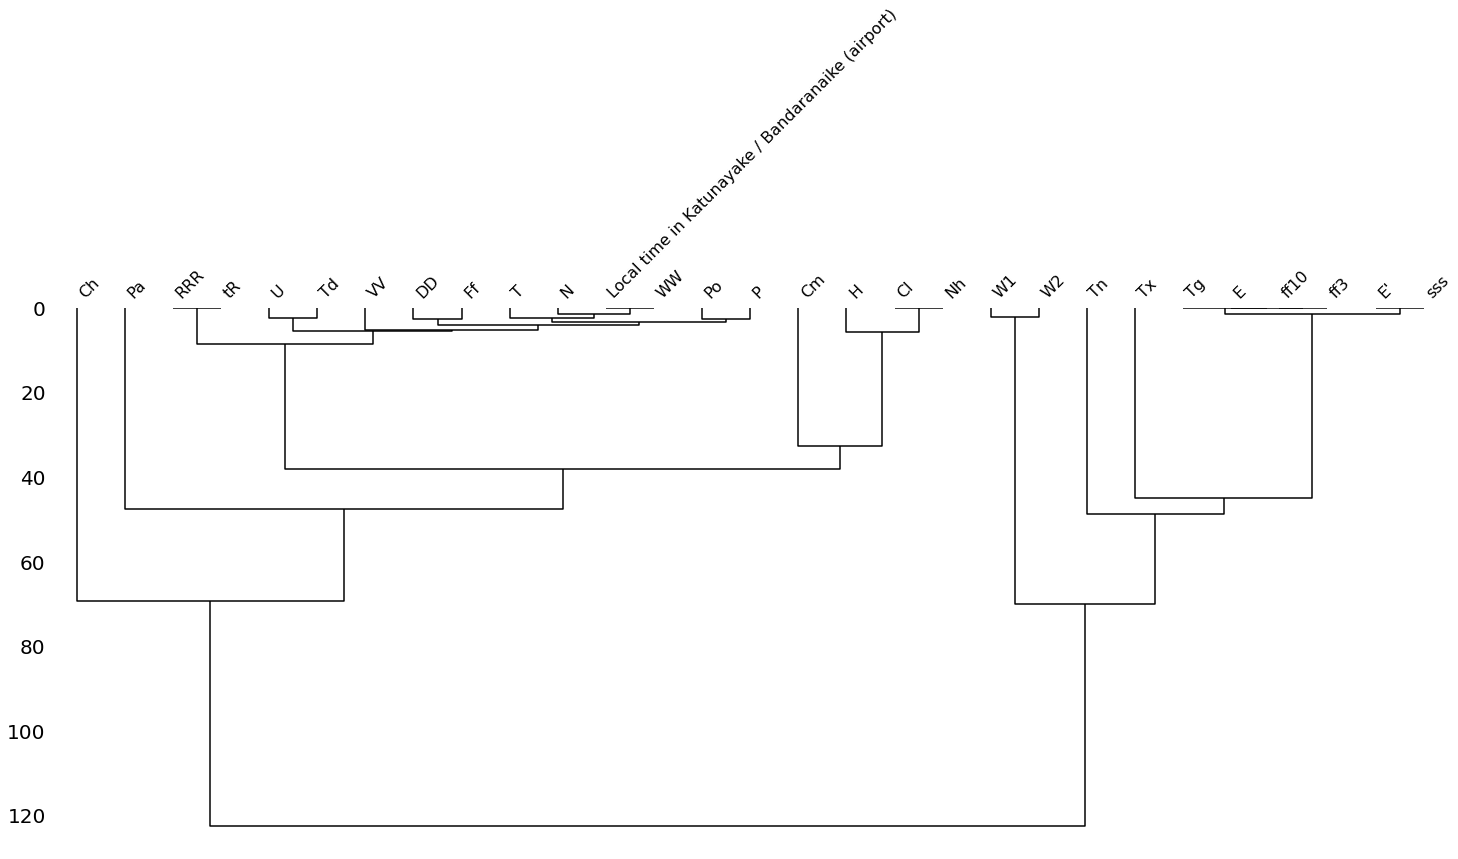

In [ ]:
#Dendrogam
masno.dendrogram(df)

In [ ]:
#Columns
df.columns

Index(['Local time in Katunayake / Bandaranaike (airport)', 'T', 'Po', 'P',
       'Pa', 'U', 'DD', 'Ff', 'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx',
       'Cl', 'Nh', 'H', 'Cm', 'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'',
       'sss'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17008 entries, 0 to 17007
Data columns (total 29 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Local time in Katunayake / Bandaranaike (airport)  17008 non-null  object 
 1   T                                                  17003 non-null  float64
 2   Po                                                 16999 non-null  float64
 3   P                                                  16998 non-null  float64
 4   Pa                                                 14977 non-null  float64
 5   U                                                  16983 non-null  float64
 6   DD                                                 16992 non-null  object 
 7   Ff                                                 16998 non-null  float64
 8   ff10                                               0 non-null      float64
 9   ff3   

In [ ]:
#Remove columns which have null values > 20%
col_num=0                                        
TotalObjects = df.shape[0] 
print ("Column\t\t\t\t\t Null Values%") 
for x in df: 
    nullCount = df[x].isnull().sum(); 
    nullPercent = nullCount*100 / (TotalObjects)
    if nullCount > 0 and nullPercent > 20 : 
        col_num=col_num+1 
        df.drop(x, axis=1,inplace=True) 
        print(str(x)+"\t\t\t\t\t "+str(nullPercent))
print ("A total of "+str(col_num)+" deleted !")

Column					 Null Values%
ff10					 100.0
ff3					 100.0
W1					 72.53057384760113
W2					 72.55409219190969
Tn					 87.53527751646284
Tx					 88.1585136406397
Ch					 30.009407337723424
E					 100.0
Tg					 100.0
E'					 99.98824082784571
sss					 99.98824082784571
A total of 11 deleted !


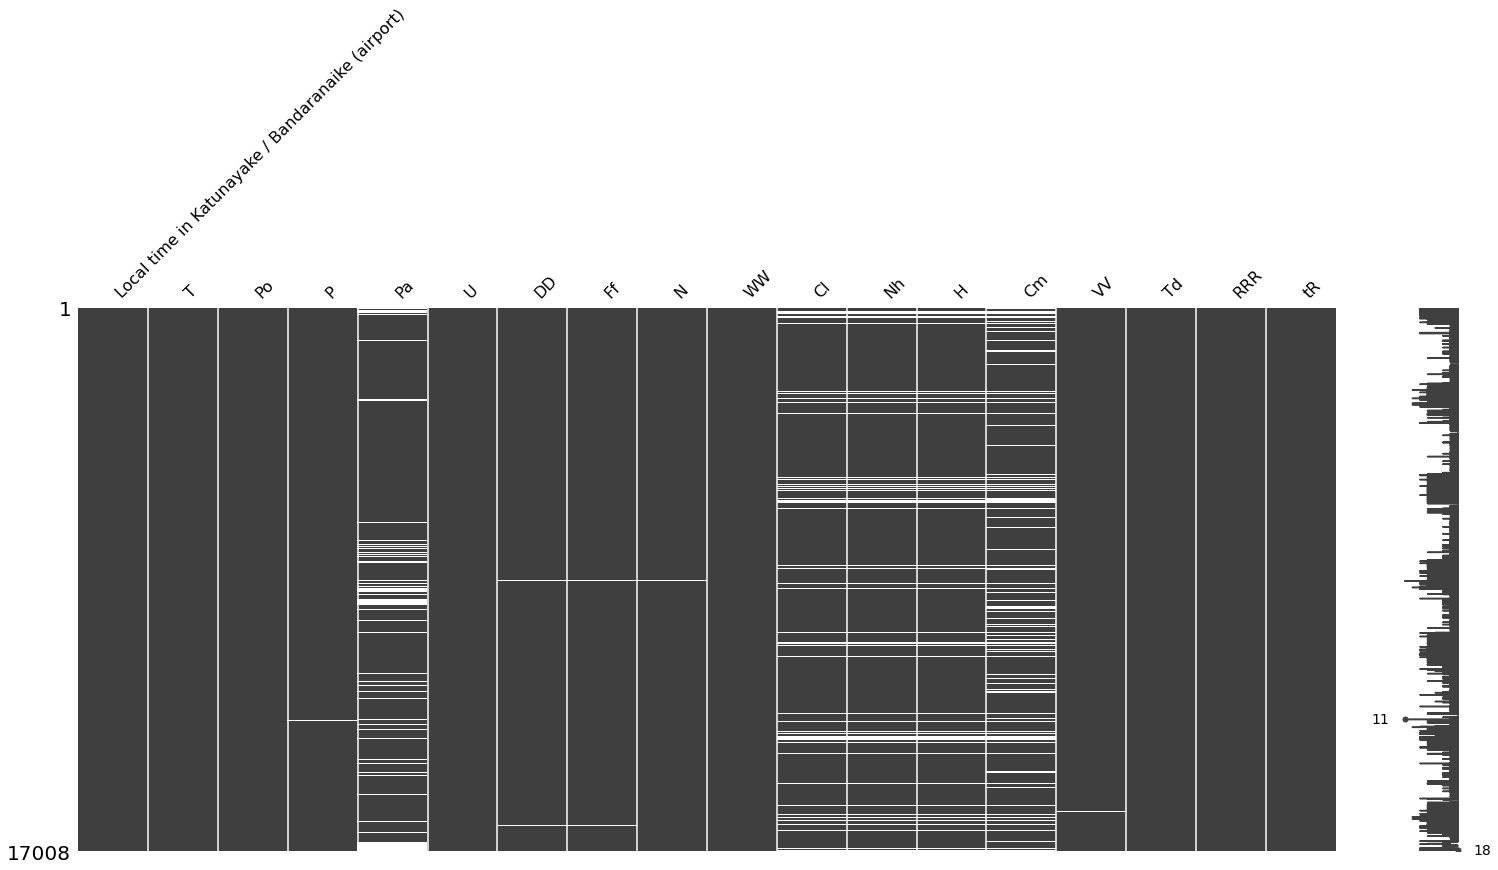

In [ ]:
df.isnull().sum()
#Matrix chart 
masno.matrix(df) #White represent null values & black represent not null value

In [ ]:
#Replace with mean
df['T'].fillna(df['T'].mean(),inplace = True) 
df['Po'].fillna(df['Po'].mean(),inplace = True)
df['P'].fillna(df['P'].mean(),inplace = True)
df['Pa'].fillna(df['Pa'].mean(),inplace = True)
df['U'].fillna(df['U'].mean(),inplace = True)
df['Ff'].fillna(df['Ff'].mean(),inplace = True)
df['Td'].fillna(df['Td'].mean(),inplace = True)
df['tR'].fillna(df['tR'].mean(),inplace = True)

In [ ]:
df['DD'].fillna('Unknown',inplace=True) 
df['Cl'].fillna('Unknown',inplace=True) 
df['WW'].fillna('Unknown',inplace=True) 
df['Nh'].fillna('Unknown',inplace=True) 
df['H'].fillna('Unknown',inplace=True) 
df['Cm'].fillna('Unknown',inplace=True) 
df['VV'].fillna('Unknown',inplace=True) 
df['RRR'].fillna('Unknown',inplace=True) 
df['N'].fillna('Unknown',inplace=True)

In [ ]:
df.isnull().sum()

Local time in Katunayake / Bandaranaike (airport)    0
T                                                    0
Po                                                   0
P                                                    0
Pa                                                   0
U                                                    0
DD                                                   0
Ff                                                   0
N                                                    0
WW                                                   0
Cl                                                   0
Nh                                                   0
H                                                    0
Cm                                                   0
VV                                                   0
Td                                                   0
RRR                                                  0
tR                                                   0
dtype: int

In [ ]:
#df.rename(columns = {'Local time in Katunayake / Bandaranaike (airport)':'dateTime'}, inplace = True)


In [ ]:
#Columns
#df.columns

In [ ]:
#Convert time datatype as datetime64 dtype
df['Local time in Katunayake / Bandaranaike (airport)'] = pd.to_datetime(df['Local time in Katunayake / Bandaranaike (airport)'], format = '%d-%m-%YT%H:%M', errors = 'coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17008 entries, 0 to 17007
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Local time in Katunayake / Bandaranaike (airport)  0 non-null      datetime64[ns]
 1   T                                                  17008 non-null  int64         
 2   Po                                                 17008 non-null  float64       
 3   P                                                  17008 non-null  float64       
 4   Pa                                                 17008 non-null  float64       
 5   U                                                  17008 non-null  float64       
 6   DD                                                 17008 non-null  object        
 7   Ff                                                 17008 non-null  float64       
 8   N               

In [ ]:
#Separate fetures and label 
features = ['Local time in Katunayake / Bandaranaike (airport)']
check_rows = features[:]
check_rows.append('T')

In [ ]:
#Convert T as a int64 or string
df['T'] = df['T'].astype('int64')
#df['T'] = df['T'].apply(str)

In [ ]:
df.head(20)

,Local time in Katunayake / Bandaranaike (airport),T,Po,P,Pa,U,DD,Ff,N,WW,Cl,Nh,H,Cm,VV,Td,RRR,tR
0,NaT,26,757.7,758.6,0.002444,84.0,"Calm, no wind",0.0,60%.,,"No Stratocumulus, Stratus, Cumulus or Cumuloni...",no clouds,"2500 or more, or no clouds.","No Altocumulus, Altostratus or Nimbostratus.",10,23.1,No precipitation,3.0
1,NaT,28,757.6,758.5,0.002444,83.0,"Calm, no wind",0.0,40%.,,Cumulus humilis or Cumulus fractus other than ...,"10% or less, but not 0",300-600,"No Altocumulus, Altostratus or Nimbostratus.",10,25.5,No precipitation,3.0
2,NaT,25,756.3,757.2,-1.300000,93.0,"Calm, no wind",0.0,50%.,,"No Stratocumulus, Stratus, Cumulus or Cumuloni...",no clouds,"2500 or more, or no clouds.","No Altocumulus, Altostratus or Nimbostratus.",9,24.2,No precipitation,3.0
3,NaT,26,757.6,758.5,0.002444,89.0,"Calm, no wind",0.0,40%.,,Cumulus humilis or Cumulus fractus other than ...,20–30%.,300-600,"No Altocumulus, Altostratus or Nimbostratus.",20,24.5,No precipitation,3.0
4,NaT,27,757.1,758.0,0.002444,80.0,Wind blowing from the north-east,3.0,70 – 80%.,,Cumulus humilis or Cumulus fractus other than ...,"10% or less, but not 0",300-600,"No Altocumulus, Altostratus or Nimbostratus.",20,23.6,No precipitation,3.0
5,NaT,25,756.4,757.4,-1.400000,90.0,Wind blowing from the north-east,1.0,"10% or less, but not 0",,"No Stratocumulus, Stratus, Cumulus or Cumuloni...",no clouds,"2500 or more, or no clouds.","No Altocumulus, Altostratus or Nimbostratus.",10,23.4,No precipitation,3.0
6,NaT,26,757.8,758.7,0.002444,84.0,Wind blowing from the north-east,3.0,40%.,,"No Stratocumulus, Stratus, Cumulus or Cumuloni...",no clouds,"2500 or more, or no clouds.","No Altocumulus, Altostratus or Nimbostratus.",10,23.5,No precipitation,3.0
7,NaT,27,757.3,758.2,0.002444,77.0,Wind blowing from the north-east,3.0,50%.,,"No Stratocumulus, Stratus, Cumulus or Cumuloni...",40%.,"2500 or more, or no clouds.",Altocumulus translucidus or opacus in two or m...,20,22.6,No precipitation,3.0
8,NaT,26,757.0,757.9,0.002444,79.0,Wind blowing from the north-east,3.0,no clouds,,Unknown,Unknown,Unknown,Unknown,10,22.3,No precipitation,3.0
9,NaT,29,754.7,755.6,0.002444,74.0,Wind blowing from the north-west,6.0,60%.,,"Cumulus mediocris or congestus, with or withou...",20–30%.,300-600,"No Altocumulus, Altostratus or Nimbostratus.",9,24.2,No precipitation,3.0


In [ ]:
#Declare X & y
X = df[features]
y = df['T']

In [ ]:
#split training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
#Use 75% for training 
len(X_train) / len(X)

0.75

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
stdscalar = StandardScaler()
X_train = stdscalar.fit_transform(X_train)
X_test = stdscalar.transform(X_test)
X_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
#provide 10 neighbors
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10)

In [ ]:
#fit training data set
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([26, 26, 26, ..., 26, 26, 26])

In [ ]:
#Score
clf.score(X_test, y_test)

0.11923800564440264

In [ ]:
scores = []
for n in range(1, 20):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

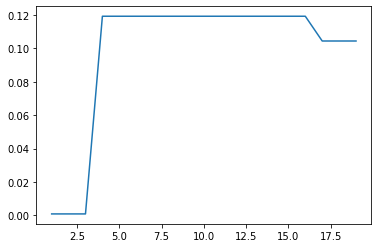

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, 20), scores)

(array([5.400e+01, 2.640e+02, 2.603e+03, 3.973e+03, 4.854e+03, 3.516e+03,
        1.505e+03, 2.290e+02, 9.000e+00, 1.000e+00]),
 array([18. , 20.1, 22.2, 24.3, 26.4, 28.5, 30.6, 32.7, 34.8, 36.9, 39. ]),
 <a list of 10 Patch objects>)

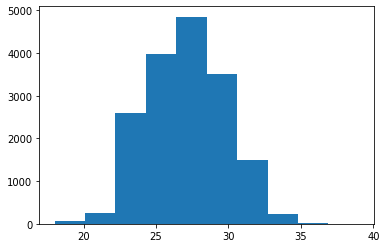

In [ ]:
plt.hist(df['T'])